In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import sklearn
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import nltk
from nltk.tag import pos_tag
import numpy as np
import seaborn as sns

In [2]:
# installing nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GABRIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GABRIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GABRIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# importing dataset
base = pd.read_csv('tripadvisor_hotel_reviews.csv' , sep=',')

In [5]:
base.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
base.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Text(0.5, 1.0, 'Rating Count')

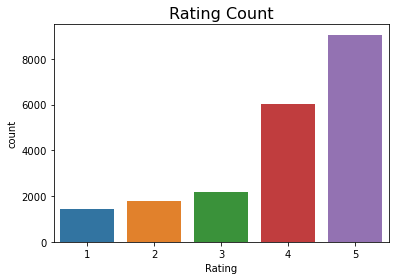

In [4]:
# plotting value counts of Rating (Unbalaced dataset)
sns.countplot(x='Rating', data= base)
plt.title('Rating Count', size = 16)

In [8]:
# counting max samples
max_samples = len(base[base['Rating']== 5])
# spliting dataset
df_maj = base[(base['Rating'] == 5) ]

# creating balanced datasets
df_q1 = base[base['Rating'] == 1]
df_q2 = base[base['Rating'] == 2]
df_q3 = base[base['Rating'] == 3]
df_q4 = base[base['Rating'] == 4]

dfm1 = resample(df_q1 ,
                replace = True,
                n_samples= max_samples,
                random_state=0)

dfm2 = resample(df_q2 ,
                replace = True,
                n_samples= max_samples,
                random_state=0)

dfm3 = resample(df_q3 ,
                replace = True,
                n_samples= max_samples,
                random_state=0)

dfm4 = resample(df_q4 ,
                replace = True,
                n_samples= max_samples,
                random_state=0)

# creating dataset balaced
base = pd.concat([df_maj , dfm1 , dfm2 , dfm3 , dfm4])

In [12]:
# spliting review words
base['Review'] = base['Review'].apply(lambda x: x.split()) 

base['Review'] = base['Review'].apply(lambda x:[item.replace(',','') for item in x if item.count(',')!=-1])

In [13]:
# importing list of words: positive and negative
eas = os.path.join('E:\\Projects\\Trip-Advisor-Hotel-Reviews\\words_list\\')
pos_words_file = os.path.join(eas, 'positive_words.txt')
neg_words_file = os.path.join(eas, 'negative_words.txt')

pos_words = []
neg_words = []

# reading .txt files
for pos_word in open(pos_words_file, 'r').readlines():
    pos_words.append(pos_word.replace('\n',''))

for neg_word in open(neg_words_file, 'r').readlines():
    neg_words.append(neg_word.replace('\n',''))

In [14]:
# counting positive words in review
base['Positive'] = base['Review'].apply(lambda x: len((set(x) & set(pos_words))))
# counting negative words in review
base['Negative'] = base['Review'].apply(lambda x: len((set(x) & set(neg_words))))
# total of words
base['Total'] = base['Review'].apply(lambda x: len(x))
# value of neutral words
base['Neutro'] = base['Total'] - (base['Positive'] + base['Negative'])
# percentage of positive words of review
base['Positive%'] = base['Positive'] / base['Total'] 
# percentage of negative words of review
base['Negative%'] = base['Negative'] / base['Total']
# difference between positive and negative words of review
base['Delta'] = base['Positive'] - base['Negative']
# counting first positives words of review (0 to 3° word)
base['First_Words_P'] = base['Review'].apply(lambda x: len((set(x[0:3]) & set(pos_words))))
# counting first negatives words of review (0 to 3° word)
base['First_Words_N'] = base['Review'].apply(lambda x: len((set(x[0:3]) & set(neg_words))))
# using nltk pack to identify the gramatical class of word
base['Tags'] = base['Review'].apply(lambda x: pos_tag(x))

In [15]:
# counting values of gramatical class
def tag_type(tag):
    tag_list = []
    for i in range(0,len(tag),1):
        tagt = tag[i][1]
        tag_list.append(tagt[0:2])
    return tag_list

base['Tag_Type'] = base['Tags'].apply(tag_type)

base['Dict_Tag'] = base['Tag_Type'].apply(lambda x :{y:x.count(y) for y in x})

In [16]:
# spliting gramatical classes in columns
def class_type(tag):
    try:
        adj = tag['JJ']
    except:
        adj = 0
    try:
        vb = tag['VB']
    except:
        vb = 0
    try:
        subs = tag['NN']
    except:
        subs = 0
    try:
        inj = tab['UH']
    except:
        inj = 0
    return pd.Series([adj , vb , subs , inj])

base[['ADJ','VB','SUBS','INJ']] = base['Dict_Tag'].apply(class_type )

base['ADJ_POS%'] = base['Positive'] / base['ADJ']

base['ADJ_NEG%'] = base['Negative'] / base['ADJ'] 

base['ADJ%'] = base['ADJ'] / base['Total']

base['VB%'] = base['VB'] / base['Total']

base['SUBS%'] = base['SUBS'] / base['Total']

base['ADJ_POS%'] = base['ADJ_POS%'].apply(lambda x: 1 if x == math.inf else x)

base['ADJ_NEG%'] = base['ADJ_NEG%'].apply(lambda x: 1 if x == math.inf else x)

base['ADJ_POS%'] = base['ADJ_POS%'].apply(lambda x: 0 if pd.isna(x) else x)

base['ADJ_NEG%'] = base['ADJ_NEG%'].apply(lambda x: 0 if pd.isna(x) else x)

In [17]:
# plot data correlation
matrix_corr = base.corr(method='spearman')
matrix_corr = matrix_corr['Rating'].sort_values(ascending=False)
print(matrix_corr)

Rating           1.000000
Delta            0.684935
Positive%        0.627200
First_Words_P    0.523813
ADJ_POS%         0.522503
ADJ%             0.394305
Positive         0.383670
SUBS%            0.099652
ADJ              0.031172
SUBS            -0.091381
Total           -0.108467
Neutro          -0.122493
VB              -0.198047
VB%             -0.338043
First_Words_N   -0.443954
Negative        -0.479234
Negative%       -0.574220
ADJ_NEG%        -0.637856
INJ                   NaN
Name: Rating, dtype: float64


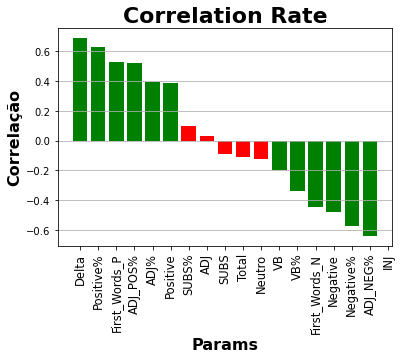

In [20]:
# data correlation
tick_label = list(matrix_corr.index)[1:]
plt.bar( [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] ,height =matrix_corr[1:],
        tick_label = tick_label,
        color = ['green','green','green','green','green',
                 'green','red','red','red','red',
                 'red','green','green','green'])
plt.xticks(rotation='vertical', fontsize=11.5)
plt.title('Correlation Rate' , fontsize=22 , weight = 'bold')
plt.xlabel('Params' , fontsize=16 , weight = 'bold')
plt.ylabel('Correlação' , fontsize=16, weight = 'bold')
plt.grid(axis = 'y')

In [21]:
# select features
features = base[['Delta','Positive%','Negative%','First_Words_P','First_Words_N',
                 'ADJ%','Negative','ADJ_POS%','Positive','ADJ_NEG%','VB%']]

label = base['Rating']

In [22]:
# scaling and spliting the features
scaler = sklearn.preprocessing.StandardScaler()

features = scaler.fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(features , label, 
                                                                            test_size = 0.25, 
                                                                            random_state = 0)

In [23]:
# using grid search to find best params of Random Forest
param_grid = [{'n_estimators':[25,30,35,40,45,50,60,80],
               'max_depth':[8,9,10,11,12,13,14,15],
               'criterion':['gini','entropy']}]

clf = RandomForestClassifier()

GS = GridSearchCV(clf , param_grid , scoring= 'accuracy' , error_score= 'raise',cv=3)

GS.fit(train_features, train_labels)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [8, 9, 10, 11, 12, 13, 14, 15],
                          'n_estimators': [25, 30, 35, 40, 45, 50, 60, 80]}],
             scoring='accuracy')

In [24]:
# training model
clf = RandomForestClassifier(criterion = GS.best_params_['criterion'],
                             n_estimators = GS.best_params_['n_estimators'],
                             max_depth = GS.best_params_['max_depth'])

clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

In [28]:
# accuracy
acc = accuracy_score(test_labels , predictions)
print('Random Forest Accuracy: ', str(round(acc,3)*100) , ' %')

Random Forest Accuracy:  85.39999999999999  %


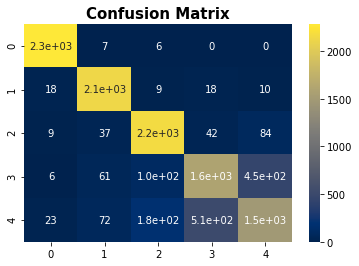

In [30]:
# confusion matrix
cm = confusion_matrix(test_labels , predictions)
sns.heatmap(cm, annot=True , cmap ='cividis')
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()